In [17]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
# MNIST
mnist_uniform = pd.read_csv(os.path.join('uniform', 'mnist', 'MNIST_8_dataset_blueprint.csv'))
mnist_ls = pd.read_csv(os.path.join('lightly_skewed', 'mnist', 'MNIST_8_dataset_blueprint.csv'))
mnist_hs = pd.read_csv(os.path.join('highly_skewed', 'mnist', 'MNIST_8_dataset_blueprint.csv'))

# FMNIST
fmnist_uniform = pd.read_csv(os.path.join('uniform', 'fmnist', 'FMNIST_8_dataset_blueprint.csv'))
fmnist_ls = pd.read_csv(os.path.join('lightly_skewed', 'fmnist', 'FMNIST_8_dataset_blueprint.csv'))
fmnist_hs = pd.read_csv(os.path.join('highly_skewed', 'fmnist', 'FMNIST_8_dataset_blueprint.csv'))

# CIFAR10
cifar_uniform = pd.read_csv(os.path.join('uniform', 'cifar10', 'CIFAR10_8_dataset_blueprint.csv'))
cifar_ls = pd.read_csv(os.path.join('lightly_skewed', 'cifar10', 'CIFAR10_8_dataset_blueprint.csv'))
cifar_hs = pd.read_csv(os.path.join('highly_skewed', 'cifar10', 'CIFAR10_8_dataset_blueprint.csv'))

# PATHMNIST
tissuemnist_uniform = pd.read_csv(os.path.join('uniform', 'tissuemnist', 'TISSUEMNIST_6_dataset_blueprint.csv'))
tissuemnist_ls = pd.read_csv(os.path.join('lightly_skewed', 'tissuemnist', 'TISSUEMNIST_6_dataset_blueprint.csv'))
tissuemnist_hs = pd.read_csv(os.path.join('highly_skewed', 'tissuemnist', 'TISSUEMNIST_6_dataset_blueprint.csv'))

In [19]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

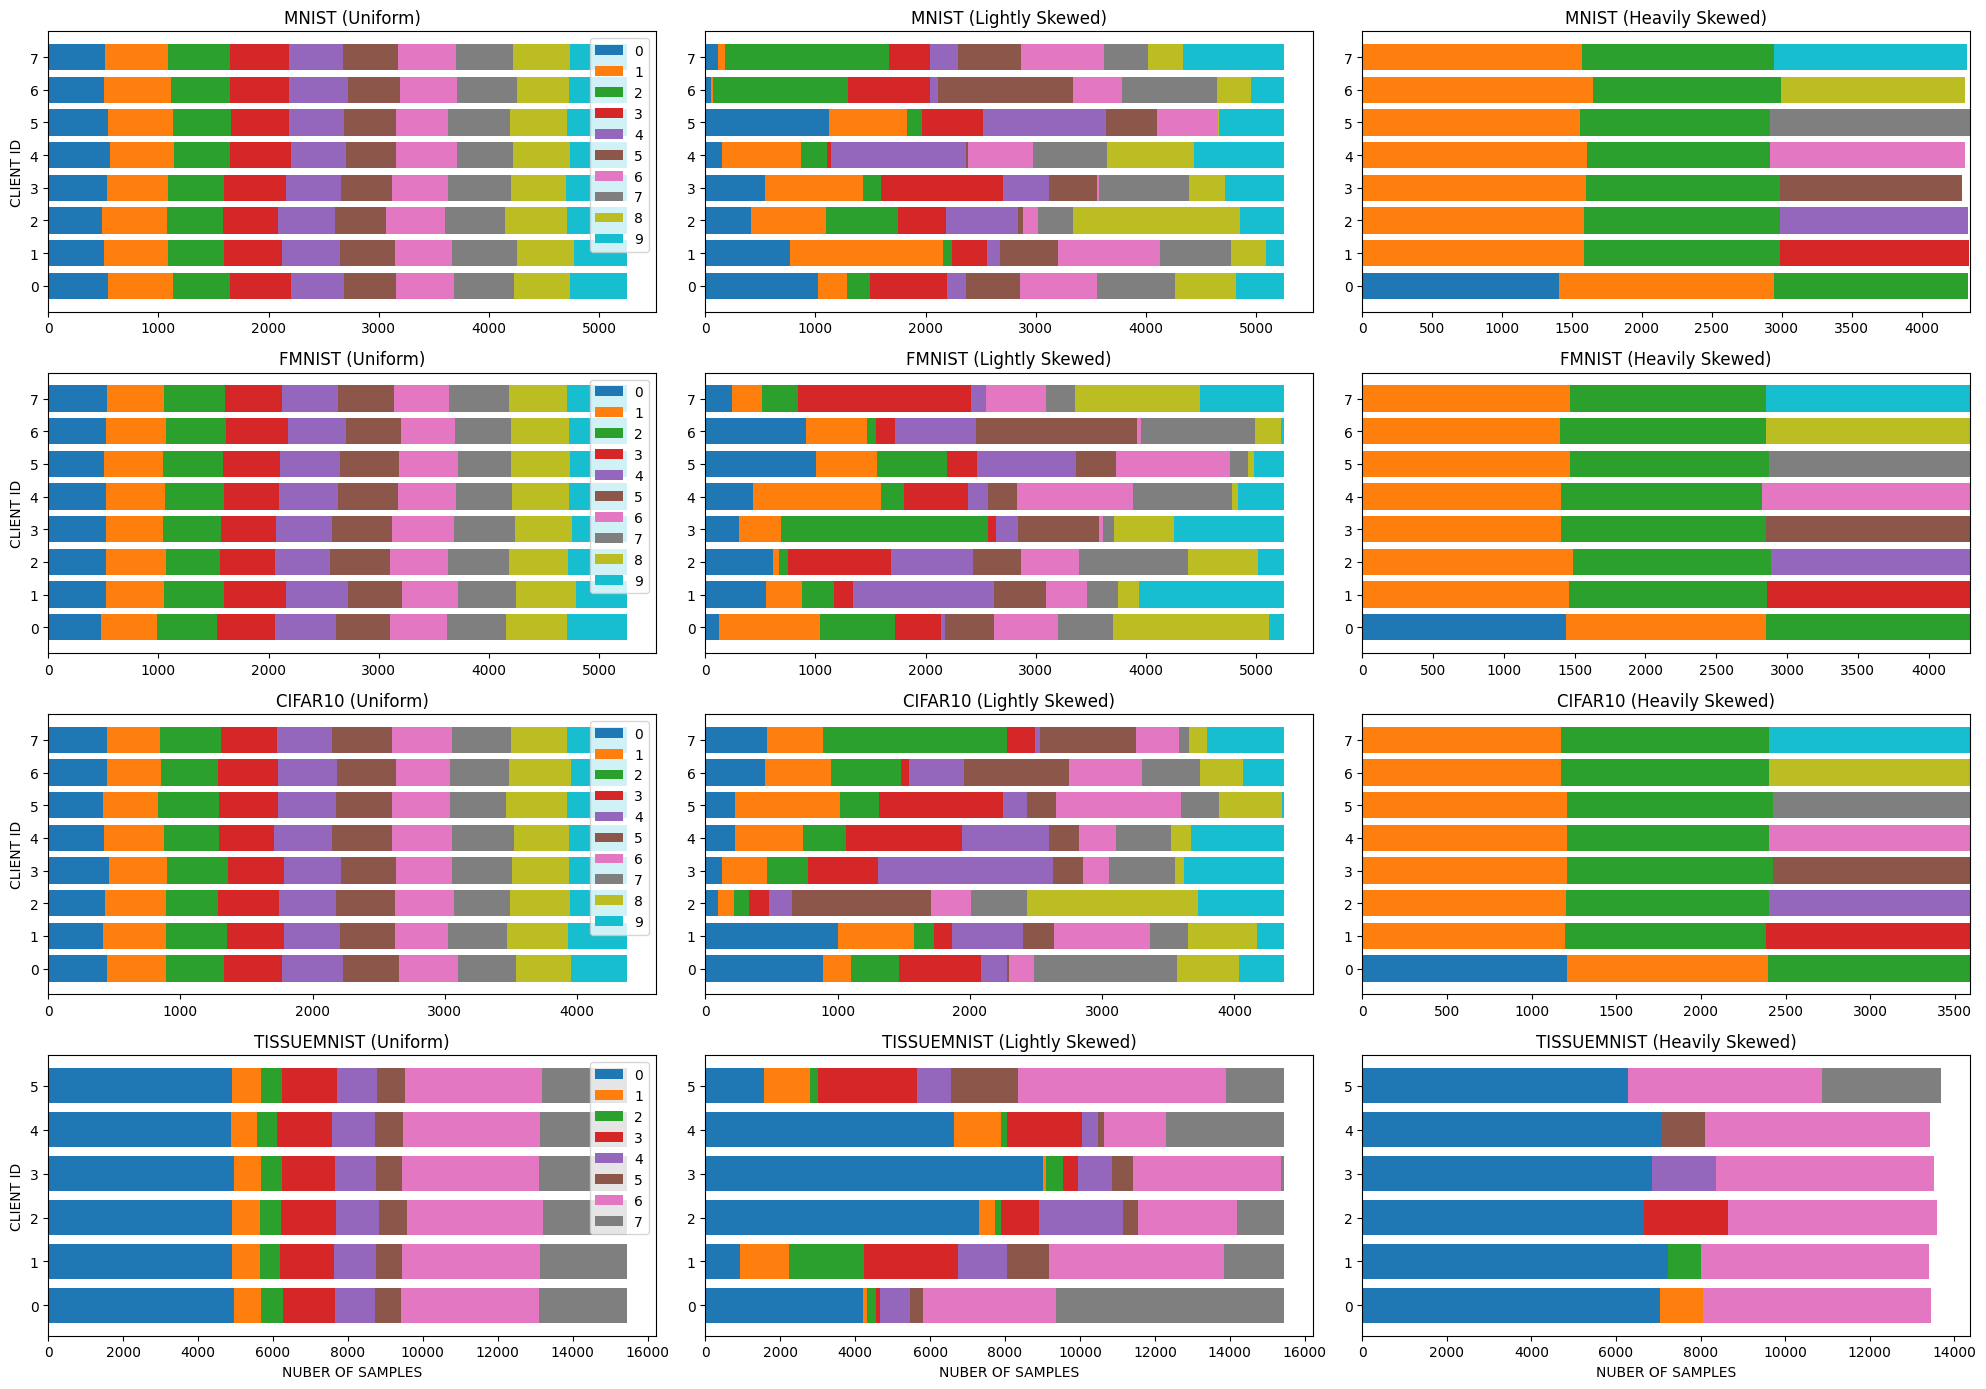

In [20]:
l = set_size(width='thesis', subplots=(2, 3), fraction=4)
fig, axes = plt.subplots(4, 3, figsize=(20, 14))

# MNIST
distribution = mnist_uniform
s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
r = range(s.shape[1])
for k in range(s.shape[0]):
    left_length = 0
    for previous in range(k):
        left_length += s[previous]
    axes[0][0].barh(r, s[k], left=left_length, label=k)
    axes[0][0].set_yticks([0,1,2,3,4,5,6,7])
    axes[0][0].set_title("MNIST (Uniform)")
    axes[0][0].set_ylabel("CLIENT ID")
    axes[0][0].legend()

distribution = mnist_ls
s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
r = range(s.shape[1])
for k in range(s.shape[0]):
    left_length = 0
    for previous in range(k):
        left_length += s[previous]
    axes[0][1].barh(r, s[k], left=left_length, label=k)
    axes[0][1].set_yticks([0,1,2,3,4,5,6,7])
    axes[0][1].set_title("MNIST (Lightly Skewed)")

distribution = mnist_hs
s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
r = range(s.shape[1])
for k in range(s.shape[0]):
    left_length = 0
    for previous in range(k):
        left_length += s[previous]
    axes[0][2].barh(r, s[k], left=left_length, label=k)
    axes[0][2].set_yticks([0,1,2,3,4,5,6,7])
    axes[0][2].set_title("MNIST (Heavily Skewed)")
    

# FMNIST
distribution = fmnist_uniform
s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
r = range(s.shape[1])
for k in range(s.shape[0]):
    left_length = 0
    for previous in range(k):
        left_length += s[previous]
    axes[1][0].barh(r, s[k], left=left_length, label=k)
    axes[1][0].set_yticks([0,1,2,3,4,5,6,7])
    axes[1][0].set_title("FMNIST (Uniform)")
    axes[1][0].set_ylabel("CLIENT ID")
    axes[1][0].legend()


distribution = fmnist_ls
s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
r = range(s.shape[1])
for k in range(s.shape[0]):
    left_length = 0
    for previous in range(k):
        left_length += s[previous]
    axes[1][1].barh(r, s[k], left=left_length, label=k)
    axes[1][1].set_yticks([0,1,2,3,4,5,6,7])
    axes[1][1].set_title("FMNIST (Lightly Skewed)")

distribution = fmnist_hs
s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
r = range(s.shape[1])
for k in range(s.shape[0]):
    left_length = 0
    for previous in range(k):
        left_length += s[previous]
    axes[1][2].barh(r, s[k], left=left_length, label=k)
    axes[1][2].set_yticks([0,1,2,3,4,5,6,7])
    axes[1][2].set_title("FMNIST (Heavily Skewed)")


# CIFAR
distribution = cifar_uniform
s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
r = range(s.shape[1])
for k in range(s.shape[0]):
    left_length = 0
    for previous in range(k):
        left_length += s[previous]
    axes[2][0].barh(r, s[k], left=left_length, label=k)
    axes[2][0].set_yticks([0,1,2,3,4,5,6,7])
    axes[2][0].set_title("CIFAR10 (Uniform)")
    axes[2][0].set_ylabel("CLIENT ID")
    axes[2][0].legend()

distribution = cifar_ls
s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
r = range(s.shape[1])
for k in range(s.shape[0]):
    left_length = 0
    for previous in range(k):
        left_length += s[previous]
    axes[2][1].barh(r, s[k], left=left_length, label=k)
    axes[2][1].set_yticks([0,1,2,3,4,5,6,7])
    axes[2][1].set_title("CIFAR10 (Lightly Skewed)")

distribution = cifar_hs
s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
r = range(s.shape[1])
for k in range(s.shape[0]):
    left_length = 0
    for previous in range(k):
        left_length += s[previous]
    axes[2][2].barh(r, s[k], left=left_length, label=k)
    axes[2][2].set_yticks([0,1,2,3,4,5,6,7])
    axes[2][2].set_title("CIFAR10 (Heavily Skewed)")


# TISSUEMNIST
distribution = tissuemnist_uniform
s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
r = range(s.shape[1])
for k in range(s.shape[0]):
    left_length = 0
    for previous in range(k):
        left_length += s[previous]
    axes[3][0].barh(r, s[k], left=left_length, label=k)
    axes[3][0].set_yticks([0,1,2,3,4,5])
    axes[3][0].set_title("TISSUEMNIST (Uniform)")
    axes[3][0].set_ylabel("CLIENT ID")
    axes[3][0].set_xlabel("NUBER OF SAMPLES")
    axes[3][0].legend()

distribution = tissuemnist_ls
s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
r = range(s.shape[1])
for k in range(s.shape[0]):
    left_length = 0
    for previous in range(k):
        left_length += s[previous]
    axes[3][1].barh(r, s[k], left=left_length, label=k)
    axes[3][1].set_yticks([0,1,2,3,4,5])
    axes[3][1].set_title("TISSUEMNIST (Lightly Skewed)")
    axes[3][1].set_xlabel("NUBER OF SAMPLES")

distribution = tissuemnist_hs
s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
r = range(s.shape[1])
for k in range(s.shape[0]):
    left_length = 0
    for previous in range(k):
        left_length += s[previous]
    axes[3][2].barh(r, s[k], left=left_length, label=k)
    axes[3][2].set_yticks([0,1,2,3,4,5])
    axes[3][2].set_title("TISSUEMNIST (Heavily Skewed)")
    axes[3][2].set_xlabel("NUBER OF SAMPLES")

fig.tight_layout()

In [22]:
fig.savefig(os.path.join(os.getcwd(), 'additional_materials', 'data_dist.png'))
fig.savefig(os.path.join(os.getcwd(), 'additional_materials', 'data_dist.pdf'))
fig.savefig(os.path.join(os.getcwd(), 'additional_materials', 'data_dist.svg'))